In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("insurance_pre.csv")
dataset

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [3]:
dataset=pd.get_dummies(dataset,dtype=int)
dataset=dataset.drop(columns=["sex_male","smoker_yes"])
dataset

,age,bmi,children,charges,sex_female,smoker_no
0,19,27.900,0,16884.92400,1,0
1,18,33.770,1,1725.55230,0,1
2,28,33.000,3,4449.46200,0,1
3,33,22.705,0,21984.47061,0,1
4,32,28.880,0,3866.85520,0,1
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1
1334,18,31.920,0,2205.98080,1,1
1335,18,36.850,0,1629.83350,1,1
1336,21,25.800,0,2007.94500,1,1


In [4]:
dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'smoker_no'], dtype='object')

In [5]:
indep= dataset[['age', 'bmi', 'children', 'sex_female', 'smoker_no']]
indep

,age,bmi,children,sex_female,smoker_no
0,19,27.900,0,1,0
1,18,33.770,1,0,1
2,28,33.000,3,0,1
3,33,22.705,0,0,1
4,32,28.880,0,0,1
...,...,...,...,...,...
1333,50,30.970,3,0,1
1334,18,31.920,0,1,1
1335,18,36.850,0,1,1
1336,21,25.800,0,1,1


In [6]:
dep=dataset[['charges']]
dep

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(indep, dep, test_size=0.30, random_state=0)

In [8]:
from sklearn.tree import DecisionTreeRegressor
#https://scikit-learn.org/1.5/modules/generated/sklearn.tree.DecisionTreeRegressor.html
#for hypertunning use some parameters
regressor=DecisionTreeRegressor(criterion='poisson',splitter='random')
regressor=regressor.fit(x_train,y_train)

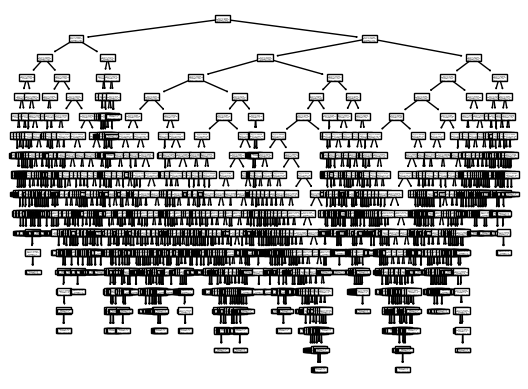

In [9]:
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

In [10]:
y_pred=regressor.predict(x_test)

In [11]:
from sklearn.metrics import r2_score
r_score= r2_score(y_test,y_pred) 
r_score

0.7348483540792277